# Assignment #2 Avigail Vantu 

In [26]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


Let's randomize a poisson distribution and demonstrate K-S and Andesron tests

In [27]:
dist_1 = np.random.poisson(1,1000)
print "KS",scipy.stats.kstest(dist_1,'norm')
print "anderson", scipy.stats.anderson(dist_2, dist='norm')
print "" 


KS KstestResult(statistic=0.5, pvalue=0.0)
anderson AndersonResult(statistic=179.59224010757316, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



P-value is 0 therefore we would reject the assumption that the poisson dis is normal 
As for 

In [28]:
dist_2 = np.random.binomial(1,0.5,1000)
print "KS2",scipy.stats.kstest(dist_2,'norm')
print "anderson",scipy.stats.anderson(dist_2, dist='norm')
print ""

KS2 KstestResult(statistic=0.5, pvalue=0.0)
anderson AndersonResult(statistic=179.4846322278197, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



For binomial didtribution we would also reject null hypothesis as the p-value is 0 so binomial is not normaly distributes.. 

KL divergence  

In [29]:
scipy.stats.entropy(dist_2,dist_1)

inf

In [40]:
narray = range(1,40,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))
def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

In [41]:
dist_n = np.random.randn(1000)
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_p = np.random.poisson(.5, 1000)

print "poisson on normal", scipy.stats.kstest(dist_p,'norm')
print "poisson on normal", scipy.stats.anderson(dist_p, dist='norm')

normal on normal KstestResult(statistic=0.017850571946747551, pvalue=0.90753759497045872)
normal on normal AndersonResult(statistic=0.31539013786527903, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal KstestResult(statistic=0.5, pvalue=0.0)
poisson on normal AndersonResult(statistic=129.69956452163615, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [42]:
threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold


[ 1.088]


In [48]:
p=0.5
for i,n in enumerate(narray):
    p=0.1 
    dist = np.random.binomial(n, p, 1000)
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

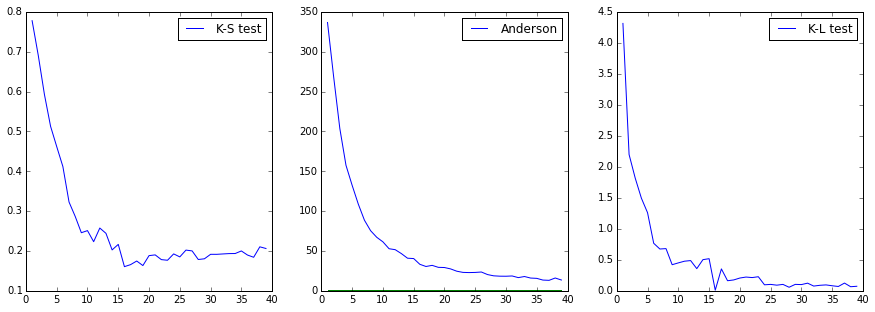

In [49]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='K-S test')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='Anderson')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L test')

pl.legend()

same for Poisson distribution 

In [52]:
narray = range(1,80,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

In [53]:
for i,n in enumerate(narray):
    p=0.1 
    dist = np.random.poisson(n, 1000)
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

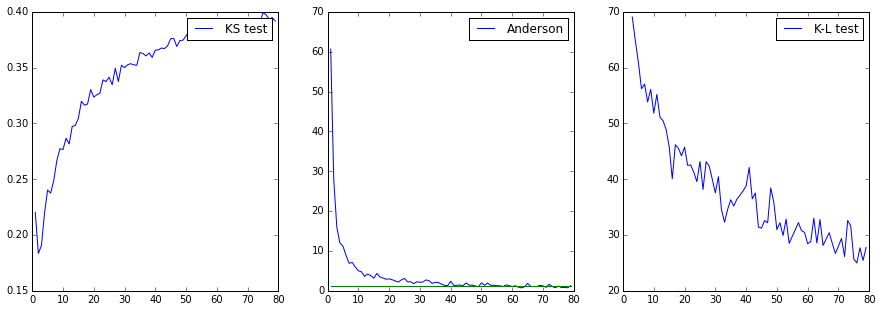

In [55]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS test')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='Anderson')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L test')

pl.legend()

the KS test provide a really surprising point of view, by ploting it we see that is goes to a completly diffrent direction than for the poission dis 